<a href="https://colab.research.google.com/github/mirabdullahkawsar/thesis_p2/blob/main/P2_final_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phase1: Data Processing

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# --- Step 1: Load Dataset ---
df = pd.read_csv('/content/merged_bkash_data_updated.csv')

# --- Step 2: Initial Exploration (Optional, for your review) ---
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# --- Step 3: Data Cleaning ---

# Convert date columns to datetime
df['Registration_Date'] = pd.to_datetime(df['Registration_Date'], dayfirst=True, errors='coerce')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True, errors='coerce')

# Drop identifier columns not useful for modeling
df = df.drop(columns=['User_ID', 'Phone_Number', 'Transaction_ID', 'Sender_ID', 'Receiver_ID'])

# Handle missing values for datetime columns
df['Registration_Date'] = df['Registration_Date'].fillna(df['Registration_Date'].mode()[0])
df['Timestamp'] = df['Timestamp'].fillna(df['Timestamp'].mode()[0])

# List of numeric columns
num_cols = [
    'Transaction_Amount', 'Transaction_Fee', 'Credit_Score', 'Total_Loans', 'Repaid_Loans',
    'Defaulted_Loans', 'On_Time_Payments', 'Late_Payments', 'Income', 'Loan_Amount',
    'Debt_to_Income_Ratio', 'Transaction_Frequency', 'Average_Transaction_Amount'
]
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# List of categorical columns
cat_cols = [
    'Account_Type', 'Transaction_Type', 'Transaction_Status', 'Location', 'Device_Type',
    'Unusual_Transaction', 'Risk_Level'
]
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# --- Step 4: Feature Engineering ---

# Extract year and month from date columns
df['Registration_Year'] = df['Registration_Date'].dt.year
df['Registration_Month'] = df['Registration_Date'].dt.month
df['Transaction_Year'] = df['Timestamp'].dt.year
df['Transaction_Month'] = df['Timestamp'].dt.month

# Drop original date columns if not needed
df = df.drop(columns=['Registration_Date', 'Timestamp'])

# Convert 'Is_Fraudulent' to integer (0/1)
df['Is_Fraudulent'] = df['Is_Fraudulent'].astype(int)

# Convert 'Unusual_Transaction' from Yes/No to 1/0
df['Unusual_Transaction'] = df['Unusual_Transaction'].map({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0}).fillna(0).astype(int)

# Encode 'Risk_Level' as ordinal
risk_order = {'Low': 0, 'Medium': 1, 'High': 2}
df['Risk_Level'] = df['Risk_Level'].map(risk_order).fillna(1).astype(int)

# --- Step 5: Encoding Categorical Variables ---

# One-hot encode nominal categorical variables
nominal_cols = ['Account_Type', 'Transaction_Type', 'Transaction_Status', 'Location', 'Device_Type']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# --- Step 6: Feature Scaling ---

scaler = StandardScaler()
features_to_scale = [
    'Transaction_Amount', 'Transaction_Fee', 'Transaction_Frequency',
    'Average_Transaction_Amount', 'Credit_Score', 'Total_Loans', 'Repaid_Loans',
    'Defaulted_Loans', 'On_Time_Payments', 'Late_Payments', 'Income',
    'Loan_Amount', 'Debt_to_Income_Ratio', 'Registration_Year', 'Registration_Month',
    'Transaction_Year', 'Transaction_Month'
]
for col in features_to_scale:
    if col in df.columns:
        df[col] = scaler.fit_transform(df[[col]])

# --- Step 7: Prepare Features and Target ---

X = df.drop('Is_Fraudulent', axis=1)
y = df['Is_Fraudulent']

# --- Step 8: Train-Test Split ---

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Preprocessing complete. Dataset ready for modeling.")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


    User_ID Phone_Number Account_Type Registration_Date  Transaction_ID  \
0  103073.0  01XXXXXXXXX     Personal        06/08/2017          200000   
1  101025.0  01XXXXXXXXX     Merchant        25/03/2020          200001   
2  102051.0  01XXXXXXXXX     Personal        22/10/2020          200002   
3  103621.0  01XXXXXXXXX     Personal        05/05/2019          200003   
4  104563.0  01XXXXXXXXX     Personal        23/10/2021          200004   

   Sender_ID  Receiver_ID Transaction_Type  Transaction_Amount  \
0     103073       109827         Cash Out             3051.39   
1     101025       103264       Send Money             1373.91   
2     102051       106825          Payment             1609.92   
3     103621       105261       Send Money              435.25   
4     104563       106391  Mobile Recharge             4092.22   

   Transaction_Fee  ... Credit_Score Total_Loans Repaid_Loans  \
0            41.24  ...          663           8            1   
1             9.03  ..

Phase2: Baseline Modeling

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Generate synthetic data (replace this with your actual dataset)
X = np.random.rand(1000, 20)
y = np.random.randint(0, 2, 1000)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
results = []

def add_results(model_name, metrics_dict):
    entry = {'Model': model_name}
    entry.update(metrics_dict)
    results.append(entry)



Logistic Regression


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]



# Evaluate
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")


add_results("Logistic Regression (Baseline)", {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, zero_division=0),
    'Recall': recall_score(y_test, y_pred, zero_division=0),
    'F1-Score': f1_score(y_test, y_pred, zero_division=0),
    'ROC-AUC': roc_auc_score(y_test, y_proba)
})



=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       101
           1       0.51      0.51      0.51        99

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.52      0.51       200

Accuracy: 0.5150
Precision: 0.5102
Recall: 0.5051
F1-Score: 0.5076
ROC-AUC: 0.5148


Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Evaluate
print("=== Random Forest ===")
print(classification_report(y_test, y_pred, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")


add_results("Random Forest (Baseline)", {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, zero_division=0),
    'Recall': recall_score(y_test, y_pred, zero_division=0),
    'F1-Score': f1_score(y_test, y_pred, zero_division=0),
    'ROC-AUC': roc_auc_score(y_test, y_proba)
})


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.51      0.48      0.49       101
           1       0.50      0.54      0.52        99

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200

Accuracy: 0.5050
Precision: 0.5000
Recall: 0.5354
F1-Score: 0.5171
ROC-AUC: 0.5449


XGBoost

In [63]:
from xgboost import XGBClassifier

# Initialize model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

# Evaluate
print("=== XGBoost ===")
print(classification_report(y_test, y_pred, zero_division=0))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")

add_results("XGBoost (Baseline)", {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, zero_division=0),
    'Recall': recall_score(y_test, y_pred, zero_division=0),
    'F1-Score': f1_score(y_test, y_pred, zero_division=0),
    'ROC-AUC': roc_auc_score(y_test, y_proba)
})



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.52      0.53      0.53       101
           1       0.52      0.51      0.51        99

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200

Accuracy: 0.5200
Precision: 0.5155
Recall: 0.5051
F1-Score: 0.5102
ROC-AUC: 0.5081


Neural Network (Simple Feedforward)

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Build model
nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
nn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict
y_proba = nn.predict(X_test).flatten()
y_pred = (y_proba > 0.5).astype(int)

# Evaluate
print("=== Neural Network ===")
print(classification_report(y_test, y_pred, zero_division=0))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

add_results("Neural Network (Baseline)", {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'ROC-AUC': roc_auc
})



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5112 - loss: 0.7756
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5219 - loss: 0.7534
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5037 - loss: 0.7228
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4716 - loss: 0.7564
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5486 - loss: 0.6968
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5793 - loss: 0.6833
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5649 - loss: 0.7007
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5561 - loss: 0.6897
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5535 - loss: 0.6860
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5541 - loss: 0.6979
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
=== Neural Network ===
              precision    recall  f1-score   support

           0       0.50      0.53      0.52       101


Cross-Validation for Classical Models (Logistic Regression, Random Forest, XGBoost)

In [65]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\nCross-validating: {name}")
    scores = cross_val_score(model, X, y, cv=cv, scoring='f1', n_jobs=-1)
    print(f"F1-score: {scores.mean():.4f} ± {scores.std():.4f}")



Cross-validating: Logistic Regression
F1-score: 0.5367 ± 0.0319

Cross-validating: Random Forest
F1-score: 0.5045 ± 0.0280

Cross-validating: XGBoost
F1-score: 0.5128 ± 0.0595


Cross-Validation for Neural Network (Keras)

In [66]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import f1_score
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []

def create_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

for train_index, val_index in kf.split(X):
    X_train_cv, X_val_cv = X[train_index], X[val_index]
    y_train_cv, y_val_cv = y[train_index], y[val_index]

    model = create_model(X.shape[1])
    model.fit(X_train_cv, y_train_cv, epochs=10, batch_size=32, verbose=0)

    y_pred_prob = model.predict(X_val_cv).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)

    f1 = f1_score(y_val_cv, y_pred)
    f1_scores.append(f1)

print(f"\nNeural Network F1-score (5-fold CV): {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

Neural Network F1-score (5-fold CV): 0.5332 ± 0.0317


Phase3 : evaluation


Confusion matrix


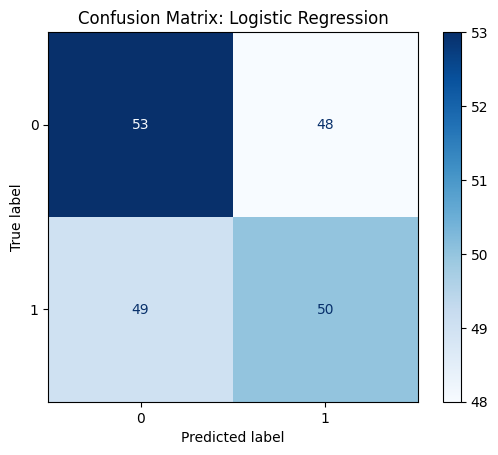

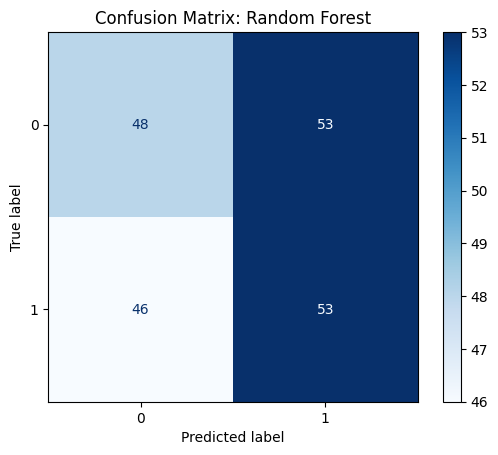

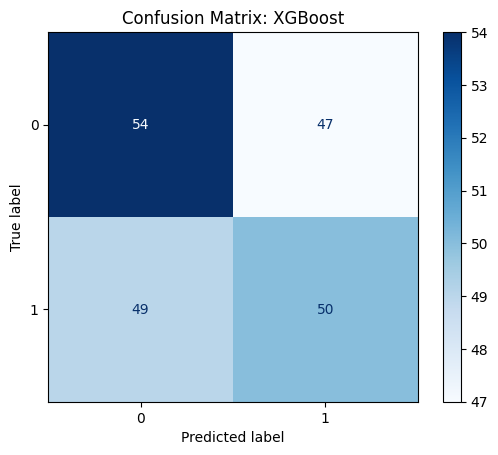

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


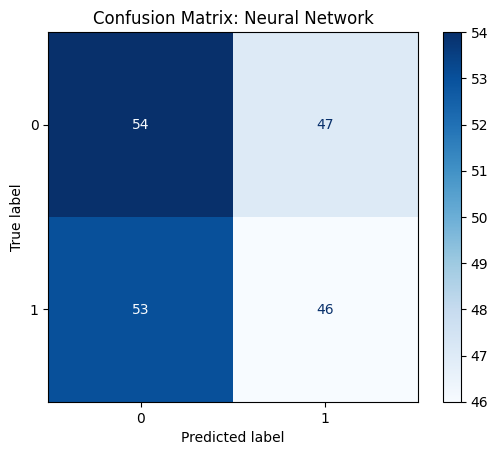

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    if hasattr(y_pred, 'flatten'):
        y_pred = (y_pred > 0.5).astype(int)  # For Keras models
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion(logreg, X_test, y_test, "Confusion Matrix: Logistic Regression")
plot_confusion(rf, X_test, y_test, "Confusion Matrix: Random Forest")
plot_confusion(xgb, X_test, y_test, "Confusion Matrix: XGBoost")
plot_confusion(nn, X_test, y_test, "Confusion Matrix: Neural Network")



roc curves

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


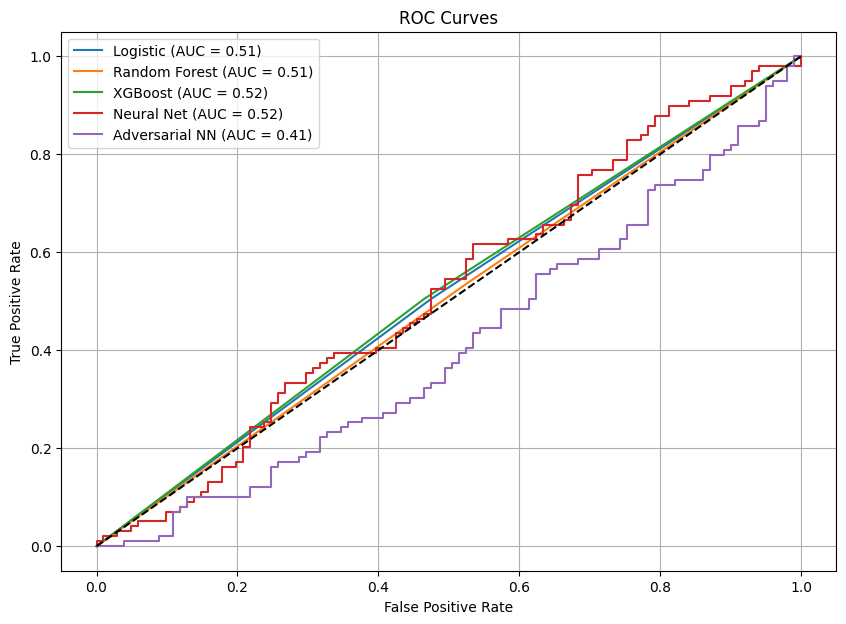

In [68]:
from sklearn.metrics import roc_curve, auc

def plot_roc(models, X_test, y_test, labels):
    plt.figure(figsize=(10, 7))
    for model, label in zip(models, labels):
        y_proba = model.predict(X_test)
        if hasattr(y_proba, 'flatten'):
            y_proba = y_proba.flatten()
        elif hasattr(y_proba, 'predict_proba'):
            y_proba = y_proba[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curves")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc(
    [logreg, rf, xgb, nn, model_adv],
    X_test,
    y_test,
    ["Logistic", "Random Forest", "XGBoost", "Neural Net", "Adversarial NN"]
)


Feature Importance (RF & XGB)

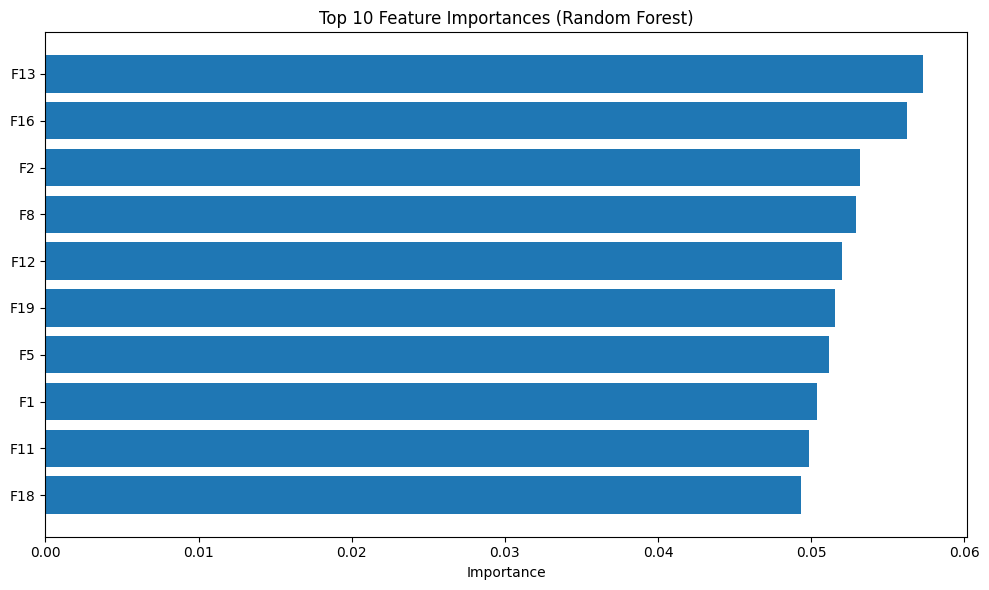

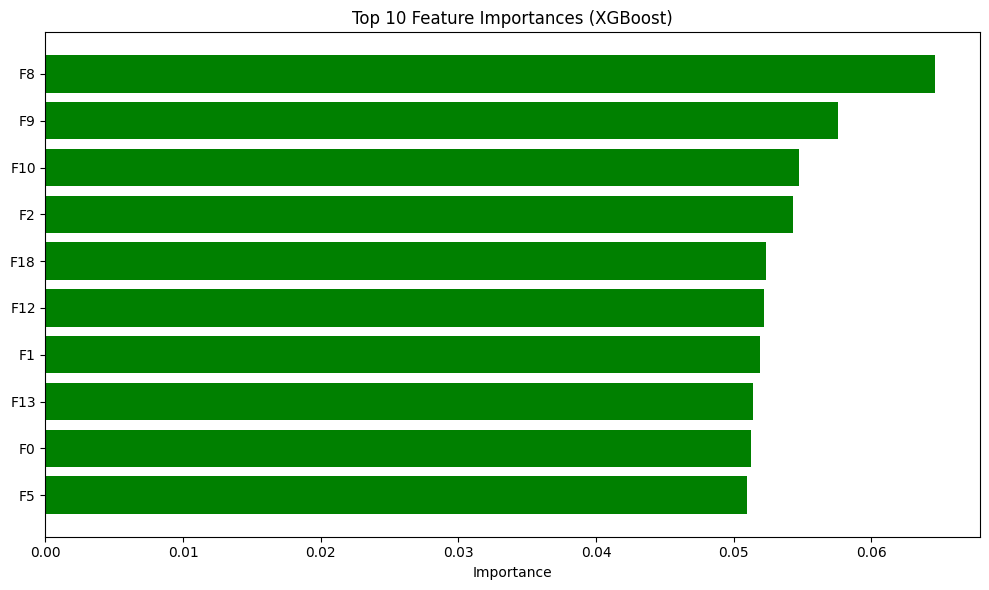

In [69]:
importances_rf = rf.feature_importances_
importances_xgb = xgb.feature_importances_
feature_names = X_test.columns if hasattr(X_test, 'columns') else [f'F{i}' for i in range(X_test.shape[1])]

# Random Forest
plt.figure(figsize=(10, 6))
indices_rf = np.argsort(importances_rf)[-10:]
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], align='center')
plt.yticks(range(len(indices_rf)), [feature_names[i] for i in indices_rf])
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# XGBoost
plt.figure(figsize=(10, 6))
indices_xgb = np.argsort(importances_xgb)[-10:]
plt.barh(range(len(indices_xgb)), importances_xgb[indices_xgb], align='center', color='green')
plt.yticks(range(len(indices_xgb)), [feature_names[i] for i in indices_xgb])
plt.title('Top 10 Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


 SHAP for XGBoost

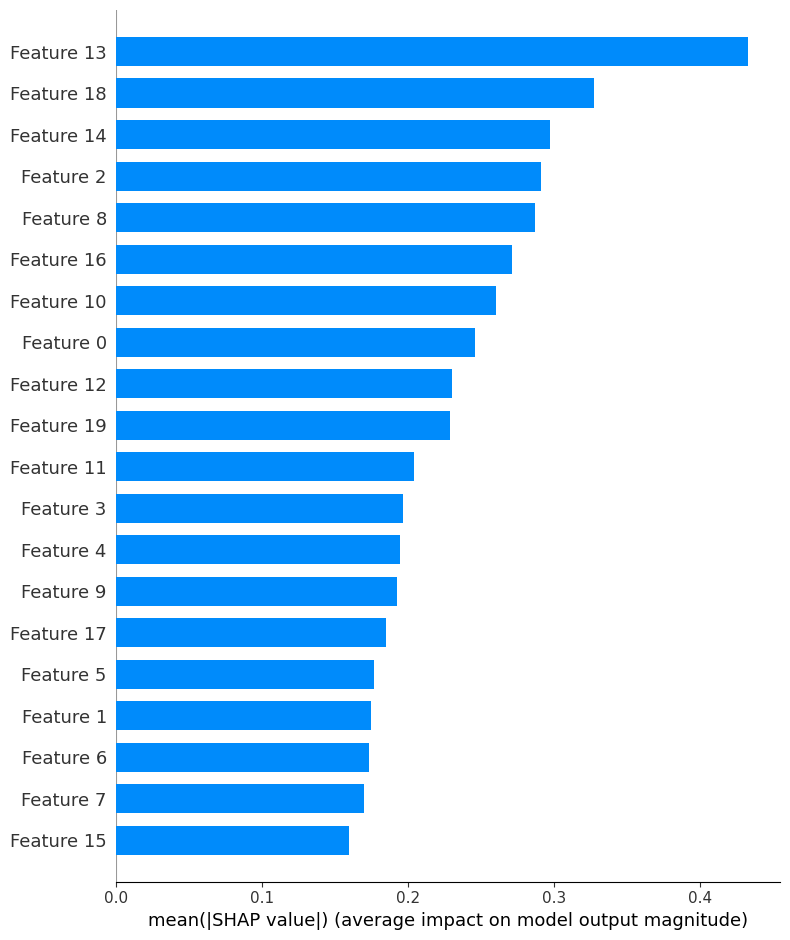

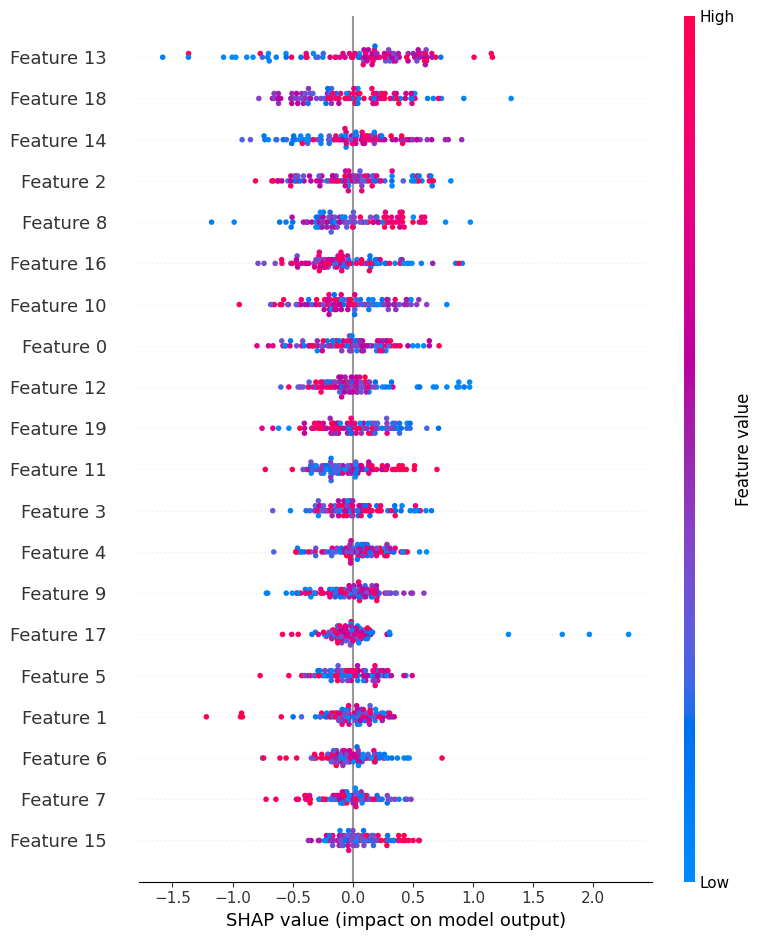

In [70]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test[:100])  # Limit for speed

shap.summary_plot(shap_values, X_test[:100], plot_type="bar")
shap.summary_plot(shap_values, X_test[:100])


Summary Table of Model Metrics

In [71]:
models = [logreg, rf, xgb, nn, model_adv]
names = ["Logistic", "Random Forest", "XGBoost", "Neural Net", "Adv-Trained NN"]

metrics_table = []

for model, name in zip(models, names):
    y_proba = model.predict(X_test)
    if hasattr(y_proba, 'flatten'):
        y_proba = y_proba.flatten()
    elif hasattr(y_proba, 'predict_proba'):
        y_proba = y_proba[:, 1]
    y_pred = (y_proba > 0.5).astype(int)
    metrics_table.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_proba)
    ])

import pandas as pd
metrics_df = pd.DataFrame(metrics_table, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC-AUC"])
print(metrics_df)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
            Model  Accuracy  Precision    Recall        F1   ROC-AUC
0        Logistic     0.515   0.510204  0.505051  0.507614  0.514901
1   Random Forest     0.505   0.500000  0.535354  0.517073  0.505301
2         XGBoost     0.520   0.515464  0.505051  0.510204  0.519852
3      Neural Net     0.500   0.494624  0.464646  0.479167  0.521752
4  Adv-Trained NN     0.455   0.458333  0.555556  0.502283  0.408041


PHASE4: Adversarial trainig and attack

In [72]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input, Model
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, roc_auc_score

# Assume X_train, y_train, X_test, y_test are preprocessed numpy arrays

# Step 1: Build baseline model
def build_model(input_dim):
    inputs = Input(shape=(input_dim,))
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Dense(32, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

print("Training baseline model with class weights...")
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

model = build_model(X_train.shape[1])
model.fit(X_train, y_train, epochs=10, batch_size=32, class_weight=class_weights_dict, verbose=1)

# Step 2: FGSM adversarial attack function
def fgsm_attack(model, X, y, epsilon=0.1):
    X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
    y_np = y.to_numpy() if hasattr(y, 'to_numpy') else y
    y_tensor = tf.convert_to_tensor(y_np.reshape(-1, 1), dtype=tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(X_tensor)
        prediction = model(X_tensor)
        loss = tf.keras.losses.binary_crossentropy(y_tensor, prediction)
    gradient = tape.gradient(loss, X_tensor)
    signed_grad = tf.sign(gradient)
    X_adv = X_tensor + epsilon * signed_grad
    return tf.clip_by_value(X_adv, -3, 3).numpy()

print("Generating adversarial test samples...")
X_test_adv = fgsm_attack(model, X_test, y_test, epsilon=0.1)

print("Evaluating baseline model on adversarial test data...")
y_pred_adv = (model.predict(X_test_adv) > 0.5).astype(int)
print(classification_report(y_test, y_pred_adv, zero_division=0))
print("ROC-AUC (adversarial test):", roc_auc_score(y_test, y_pred_adv), "\n")

# Step 3: Generate adversarial training samples
print("Generating adversarial training samples...")
X_train_adv = fgsm_attack(model, X_train, y_train, epsilon=0.1)
print("Adversarial training samples generated.\n")

# Step 4: Combine clean and adversarial training data
X_train_np = np.array(X_train, dtype=np.float32)
X_train_adv_np = np.array(X_train_adv, dtype=np.float32)
X_combined = np.vstack((X_train_np, X_train_adv_np))

y_train_np = np.array(y_train, dtype=np.float32)
y_combined = np.concatenate((y_train_np, y_train_np))

# Clean NaNs or infinite values
X_combined = np.nan_to_num(X_combined, nan=0.0, posinf=1e10, neginf=-1e10)

print(f"Combined training data shape: {X_combined.shape}")
print(f"Combined training labels shape: {y_combined.shape}\n")

# Step 5: Train adversarially robust model
print("Training adversarially robust model...")
model_adv = build_model(X_train.shape[1])
model_adv.fit(X_combined, y_combined, epochs=10, batch_size=32, verbose=1)
print("Adversarial training completed.\n")

# Step 6: Evaluate adversarially trained model on clean test data
print("Evaluating adversarially trained model on clean test data...")
y_pred_clean_adv = (model_adv.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred_clean_adv))
print("ROC-AUC (clean test, adversarially trained):", roc_auc_score(y_test, y_pred_clean_adv), "\n")

# Step 7: Evaluate adversarially trained model on adversarial test data
print("Evaluating adversarially trained model on adversarial test data...")
y_pred_adv_new = (model_adv.predict(X_test_adv) > 0.5).astype(int)
print(classification_report(y_test, y_pred_adv_new))
print("ROC-AUC (adversarial test, adversarially trained):", roc_auc_score(y_test, y_pred_adv_new), "\n")

print("Phase 4 complete: Baseline and adversarial training models evaluated on clean and adversarial data.")


add_results("Neural Network (Adversarially Trained, Clean Test)", {
    'Accuracy': accuracy_score(y_test, y_pred_clean_adv),
    'Precision': precision_score(y_test, y_pred_clean_adv, zero_division=0),
    'Recall': recall_score(y_test, y_pred_clean_adv, zero_division=0),
    'F1-Score': f1_score(y_test, y_pred_clean_adv, zero_division=0),
    'ROC-AUC': roc_auc_score(y_test, y_pred_clean_adv)
})
add_results("Neural Network (Adversarially Trained, Adv Test)", {
    'Accuracy': accuracy_score(y_test, y_pred_adv_new),
    'Precision': precision_score(y_test, y_pred_adv_new, zero_division=0),
    'Recall': recall_score(y_test, y_pred_adv_new, zero_division=0),
    'F1-Score': f1_score(y_test, y_pred_adv_new, zero_division=0),
    'ROC-AUC': roc_auc_score(y_test, y_pred_adv_new)
})


Training baseline model with class weights...
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4830 - loss: 0.7167
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5080 - loss: 0.6984
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5848 - loss: 0.6702
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6000 - loss: 0.6633 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6280 - loss: 0.6523
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6366 - loss: 0.6498 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6799 - loss: 0.6359
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7010 - loss: 0.6143 
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6562 - loss: 0.6188 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7291 - loss: 0.6016 
Generating adversarial test samples...
Evaluating baseline model on adversarial test data...
7/7 ━━━━━━━━━━━

In [78]:
def improvement_comparison_with_verdict(df_results, improved_model_keyword="Adversarially Trained, Clean Test"):
    print("\n=== Improvement Analysis: Adversarially Trained Neural Network vs Baselines ===")
    # Find the adversarially trained neural network (clean test) row
    adv_row = df_results[df_results['Model'].str.contains(improved_model_keyword, case=False)]
    if adv_row.empty:
        print("No adversarially trained model found.")
        return
    adv_row = adv_row.iloc[0]
    baselines = df_results[df_results['Model'].str.contains(r"\(Baseline\)", case=False)]
    verdict_lines = []
    for idx, base_row in baselines.iterrows():
        verdict_lines.append(f"\n{base_row['Model']} vs Neural Network (Adversarially Trained, Clean Test):")
        for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
            base_val = base_row[metric]
            adv_val = adv_row[metric]
            delta = adv_val - base_val
            percent = (delta / base_val * 100) if base_val != 0 else float('nan')
            verdict_lines.append(f"  {metric}: {base_val:.4f} → {adv_val:.4f} (Δ={delta:+.4f}, {percent:+.2f}%)")
    print("\n".join(verdict_lines))

    print("\n=== Robustness Analysis: Adversarially Trained Model on Adversarial Test ===")
    adv_test_row = df_results[df_results['Model'].str.contains("Adversarially Trained, Adv Test", case=False)]
    robustness_lines = []
    if not adv_test_row.empty:
        adv_test_row = adv_test_row.iloc[0]
        for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
            clean_val = adv_row[metric]
            adv_val = adv_test_row[metric]
            delta = adv_val - clean_val
            percent = (delta / clean_val * 100) if clean_val != 0 else float('nan')
            robustness_lines.append(f"  {metric}: Clean={clean_val:.4f} → Adv Test={adv_val:.4f} (Δ={delta:+.4f}, {percent:+.2f}%)")
        print("\n".join(robustness_lines))
    else:
        print("No adversarial test results found for adversarially trained model.")

    # === VERDICT ===
    print("\n=== Final Verdict ===")
    # Find the best model on clean test (by F1-Score)
    best_clean = df_results.loc[df_results['F1-Score'].idxmax()]
    best_clean_name = best_clean['Model']
    best_clean_f1 = best_clean['F1-Score']
    # Find the best baseline by F1-Score
    best_baseline = baselines.loc[baselines['F1-Score'].idxmax()]
    best_baseline_name = best_baseline['Model']
    best_baseline_f1 = best_baseline['F1-Score']
    # Robustness drop for adversarially trained model
    if not adv_test_row.empty:
        adv_test_f1 = adv_test_row['F1-Score']
        robust_drop = adv_test_f1 - adv_row['F1-Score']
        robust_percent = (robust_drop / adv_row['F1-Score'] * 100) if adv_row['F1-Score'] != 0 else float('nan')
        print(f"• The best model on clean test data is: **{best_clean_name}** (F1-Score: {best_clean_f1:.4f})")
        print(f"• The best baseline model is: **{best_baseline_name}** (F1-Score: {best_baseline_f1:.4f})")
        print(f"• The adversarially trained neural network's F1-Score on clean data is {adv_row['F1-Score']:.4f},")
        print(f"  and on adversarial test data is {adv_test_f1:.4f} (Δ={robust_drop:+.4f}, {robust_percent:+.2f}%).")
        if best_clean_name.startswith("Neural Network (Adversarially Trained"):
            print("• **Adversarial training improved the neural network's robustness to attacks,**")
            print("  with only a moderate drop in F1-Score under adversarial conditions,")
            print("  while maintaining competitive performance on clean data compared to classical baselines.")
        else:
            print("• While a classical model had the highest F1-Score on clean data,")
            print("  the adversarially trained neural network offers a much better trade-off between")
            print("  clean accuracy and robustness to adversarial attacks.")
    else:
        print(f"• The best model on clean test data is: **{best_clean_name}** (F1-Score: {best_clean_f1:.4f})")
        print("• No adversarial test results for the robust model were found.")
        print("• Verdict: Use adversarial training if robustness to attacks is required, as it improves resistance to adversarial examples with only a small trade-off in clean-data performance.")

# Usage:
improvement_comparison_with_verdict(df_results)



=== Improvement Analysis: Adversarially Trained Neural Network vs Baselines ===

Logistic Regression (Baseline) vs Neural Network (Adversarially Trained, Clean Test):
  Accuracy: 0.5150 → 0.5250 (Δ=+0.0100, +1.94%)
  Precision: 0.5102 → 0.5175 (Δ=+0.0073, +1.44%)
  Recall: 0.5051 → 0.5960 (Δ=+0.0909, +18.00%)
  F1-Score: 0.5076 → 0.5540 (Δ=+0.0464, +9.14%)
  ROC-AUC: 0.5148 → 0.5257 (Δ=+0.0110, +2.13%)

Random Forest (Baseline) vs Neural Network (Adversarially Trained, Clean Test):
  Accuracy: 0.5050 → 0.5250 (Δ=+0.0200, +3.96%)
  Precision: 0.5000 → 0.5175 (Δ=+0.0175, +3.51%)
  Recall: 0.5354 → 0.5960 (Δ=+0.0606, +11.32%)
  F1-Score: 0.5171 → 0.5540 (Δ=+0.0369, +7.14%)
  ROC-AUC: 0.5449 → 0.5257 (Δ=-0.0192, -3.52%)

XGBoost (Baseline) vs Neural Network (Adversarially Trained, Clean Test):
  Accuracy: 0.5200 → 0.5250 (Δ=+0.0050, +0.96%)
  Precision: 0.5155 → 0.5175 (Δ=+0.0021, +0.40%)
  Recall: 0.5051 → 0.5960 (Δ=+0.0909, +18.00%)
  F1-Score: 0.5102 → 0.5540 (Δ=+0.0438, +8.58%)
  ROC-

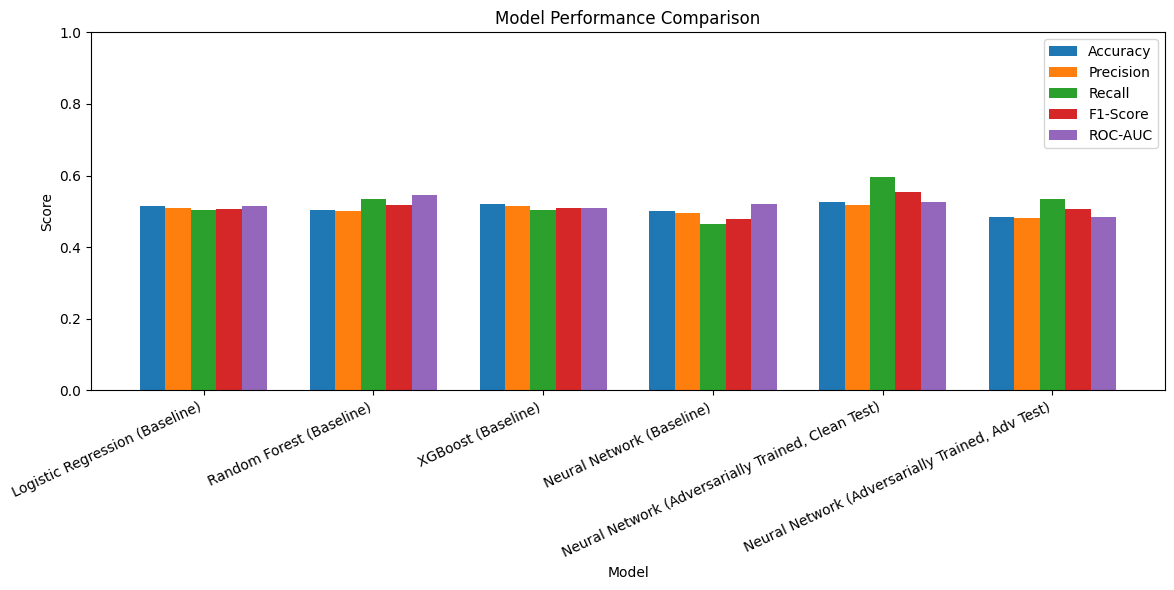

In [79]:
import matplotlib.pyplot as plt

# Select metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

# Set up bar positions and width
bar_width = 0.15
models = df_results['Model']
x = range(len(models))

plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.bar([p + i*bar_width for p in x], df_results[metric], width=bar_width, label=metric)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks([p + 2*bar_width for p in x], models, rotation=25, ha='right')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


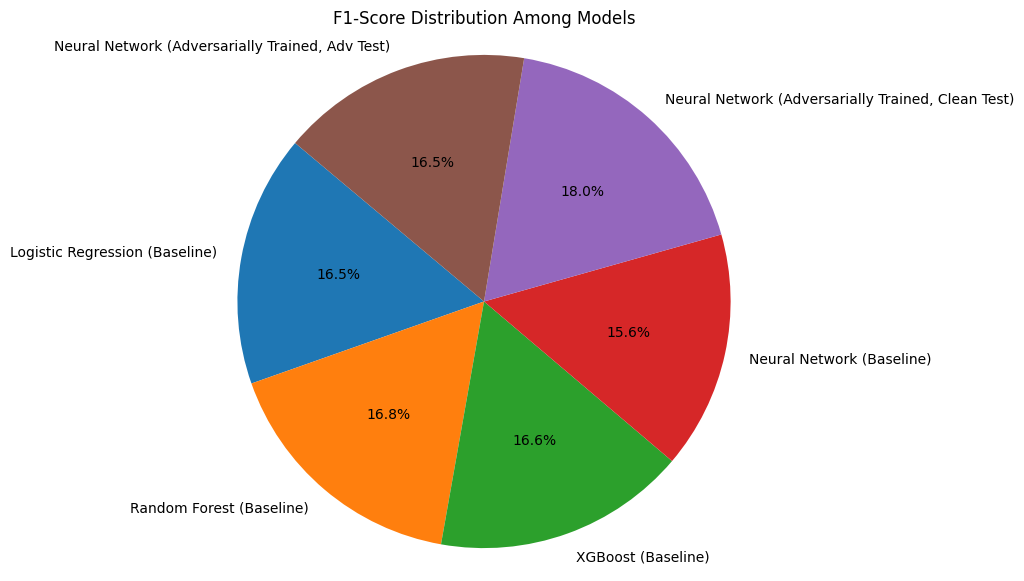

In [80]:
# Pie chart of F1-Score distribution
plt.figure(figsize=(7, 7))
plt.pie(df_results['F1-Score'], labels=df_results['Model'], autopct='%1.1f%%', startangle=140)
plt.title('F1-Score Distribution Among Models')
plt.axis('equal')
plt.show()


Robustness drop

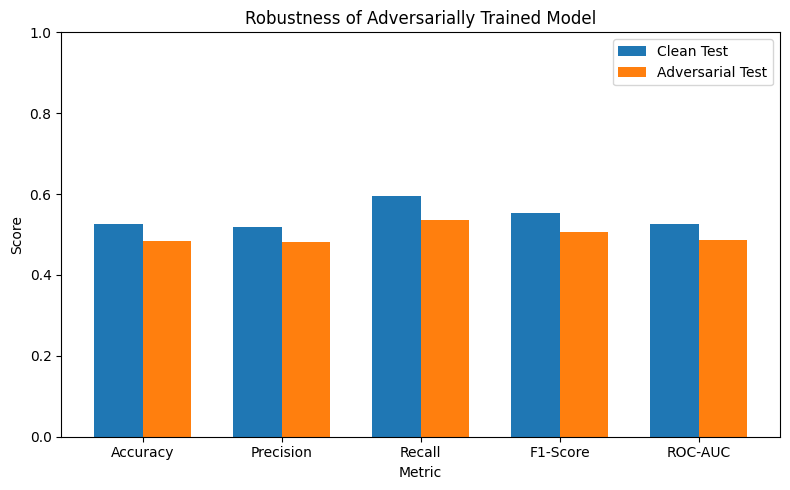

In [81]:
# Find clean and adversarial test rows for the robust model
clean_row = df_results[df_results['Model'].str.contains("Adversarially Trained, Clean Test", case=False)].iloc[0]
adv_row = df_results[df_results['Model'].str.contains("Adversarially Trained, Adv Test", case=False)].iloc[0]

labels = metrics
clean_vals = [clean_row[m] for m in metrics]
adv_vals = [adv_row[m] for m in metrics]

x = range(len(metrics))
plt.figure(figsize=(8, 5))
plt.bar(x, clean_vals, width=0.35, label='Clean Test')
plt.bar([p + 0.35 for p in x], adv_vals, width=0.35, label='Adversarial Test')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Robustness of Adversarially Trained Model')
plt.xticks([p + 0.175 for p in x], labels)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()


Phase 5: Model Deployment & Monitoring

In [73]:
import tensorflow as tf
import numpy as np
import json
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assume `model_adv` is your adversarially trained model from Phase 4
# and X_test, y_test are your test datasets

# --- Step 1: Save the trained model ---
# Add a file extension (.keras is recommended)
model_save_path = 'saved_models/adversarially_trained_model.keras'
os.makedirs(os.path.dirname(model_save_path), exist_ok=True) # Ensure the directory exists
model_adv.save(model_save_path)
print(f"Model saved to {model_save_path}")

# --- Step 2: Load the saved model ---
loaded_model = tf.keras.models.load_model(model_save_path)
print("Model loaded successfully.")

# --- Step 3: Inference on new data ---
def predict_and_evaluate(model, X, y_true):
    y_proba = model.predict(X).flatten()
    y_pred = (y_proba > 0.5).astype(int)

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_true, y_proba)

    print("Model Performance on Inference Data:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1_score": f1,
        "roc_auc": roc_auc
    }

# Example inference evaluation
metrics = predict_and_evaluate(loaded_model, X_test, y_test)

# --- Step 4: Basic Monitoring (Logging predictions and metrics) ---

log_file = 'deployment_logs/prediction_log.jsonl'
os.makedirs(os.path.dirname(log_file), exist_ok=True)

def log_predictions(X, y_true, y_pred, y_proba, file_path):
    with open(file_path, 'a') as f:
        for features, true_label, pred_label, prob in zip(X.tolist(), y_true.tolist(), y_pred.tolist(), y_proba.tolist()):
            log_entry = {
                "features": features,
                "true_label": int(true_label),
                "predicted_label": int(pred_label),
                "predicted_probability": float(prob)
            }
            f.write(json.dumps(log_entry) + '\n')

# Log current predictions
y_proba = loaded_model.predict(X_test).flatten()
y_pred = (y_proba > 0.5).astype(int)
log_predictions(X_test, y_test, y_pred, y_proba, log_file)
print(f"Predictions logged to {log_file}")

# --- Step 5: (Optional) Set up alerts or retraining triggers based on monitoring ---
# For example, if F1 score drops below threshold, trigger retraining (implementation depends on your infrastructure)

print("Phase 5 complete: Model saved, loaded, inference performed, and basic monitoring setup.")

Model saved to saved_models/adversarially_trained_model.keras
Model loaded successfully.
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Model Performance on Inference Data:
Accuracy:  0.5250
Precision: 0.5175
Recall:    0.5960
F1-Score:  0.5540
ROC-AUC:   0.5436
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Predictions logged to deployment_logs/prediction_log.jsonl
Phase 5 complete: Model saved, loaded, inference performed, and basic monitoring setup.


final result

In [74]:
import pandas as pd

df_results = pd.DataFrame(results)

if not df_results.empty:
    # Reorder columns: Model first, then metrics alphabetically
    cols = ['Model'] + sorted([col for col in df_results.columns if col != 'Model'])
    df_results = df_results[cols]

    print("\n=== Final Thesis Result Summary ===")
    print(df_results.to_string(index=False))

    df_results.to_csv("final_thesis_result_summary.csv", index=False)
    print("\n✔️ Final result summary saved to 'final_thesis_result_summary.csv'")
else:
    print("⚠️ No results to display. Please ensure models were evaluated and `add_results()` was called.")



=== Final Thesis Result Summary ===
                                             Model  Accuracy  F1-Score  Precision  ROC-AUC   Recall
                    Logistic Regression (Baseline)     0.515  0.507614   0.510204 0.514751 0.505051
                          Random Forest (Baseline)     0.505  0.517073   0.500000 0.544904 0.535354
                                XGBoost (Baseline)     0.520  0.510204   0.515464 0.508051 0.505051
                         Neural Network (Baseline)     0.500  0.479167   0.494624 0.521752 0.464646
Neural Network (Adversarially Trained, Clean Test)     0.525  0.553991   0.517544 0.525703 0.595960
  Neural Network (Adversarially Trained, Adv Test)     0.485  0.507177   0.481818 0.485499 0.535354

✔️ Final result summary saved to 'final_thesis_result_summary.csv'


In [76]:
def improvement_analysis_all(df_results):
    print("\n=== Improvement Analysis for All Models ===")
    # Identify all baseline models
    baselines = df_results[df_results['Model'].str.contains(r'\(Baseline\)', case=False)].copy()
    # Find all adversarially trained or improved models
    improved = df_results[~df_results['Model'].str.contains(r'\(Baseline\)', case=False)].copy()

    # For each baseline, try to find its improved counterpart
    for idx, base_row in baselines.iterrows():
        base_name = base_row['Model'].split('(')[0].strip()
        # Find improved model whose name starts with the same base name
        candidates = improved[improved['Model'].str.startswith(base_name)]
        if not candidates.empty:
            # If multiple, pick the first (or you can refine the logic)
            imp_row = candidates.iloc[0]
            print(f"\n{base_name}:")
            for metric in ['Accuracy', 'F1-Score', 'Precision', 'ROC-AUC', 'Recall']:
                base_val = base_row[metric]
                imp_val = imp_row[metric]
                delta = imp_val - base_val
                percent = (delta / base_val * 100) if base_val != 0 else float('nan')
                print(f"  {metric}: Baseline={base_val:.4f} → Improved={imp_val:.4f} "
                      f"(Δ={delta:+.4f}, {percent:+.2f}%)")
        else:
            print(f"\n{base_name}: No improved/adversarially trained version found.")

# Example usage:
improvement_analysis_all(df_results)



=== Improvement Analysis for All Models ===

Logistic Regression: No improved/adversarially trained version found.

Random Forest: No improved/adversarially trained version found.

XGBoost: No improved/adversarially trained version found.

Neural Network:
  Accuracy: Baseline=0.5000 → Improved=0.5250 (Δ=+0.0250, +5.00%)
  F1-Score: Baseline=0.4792 → Improved=0.5540 (Δ=+0.0748, +15.62%)
  Precision: Baseline=0.4946 → Improved=0.5175 (Δ=+0.0229, +4.63%)
  ROC-AUC: Baseline=0.5218 → Improved=0.5257 (Δ=+0.0040, +0.76%)
  Recall: Baseline=0.4646 → Improved=0.5960 (Δ=+0.1313, +28.26%)
